In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path as ospath

In [2]:
excelfile = ospath.join('..','Serious games','Games','БД4_Лёгкая.xlsm')

Alldata = pd.read_excel(excelfile,sheet_name='Данные')
print(Alldata.columns)
Games = pd.read_excel(excelfile,sheet_name='Игры')
Games.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp'],
      dtype='object')


Index(['Session', 'Game', 'Date', 'Place', 'GamersCount', 'R',
       'Parametr1_alfa', 'Parametr2_beta', 'Mechname', 'GameMech',
       'Cooperation', 'talks', 'Name', 'Datafile', 'Sbjfile', 'стимул',
       'Group', 'Курс балла', 'End step'],
      dtype='object')

In [3]:
YHGames=Games[(Games.Mechname=='yh') & (Games.GameMech=='agree')]
YHExpGames=Games[(Games.Mechname=='yh') & (Games.GameMech=='exp')]

YHData=Alldata[Alldata.Game.isin(YHGames.Game)]
YHEData=Alldata[Alldata.Game.isin(YHExpGames.Game)]

print(YHData.shape,YHEData.shape)

(1035, 16) (90, 16)


In [4]:
GLGames=Games[(Games.Mechname=='gl') & (Games.GameMech=='agree')]
GLData=Alldata[Alldata.Game.isin(GLGames.Game)]

GLEGames=Games[(Games.Mechname=='gl') & (Games.GameMech=='exp')]
GLEData=Alldata[Alldata.Game.isin(GLEGames.Game)]

GLData.shape

(2847, 16)

In [4]:
from scipy.spatial import distance

In [5]:
distance.cityblock([49,41,25],[38.3,38.3,38.3])

26.700000000000003

## Добавляем столбец с Наилучшим ответом и гамма (вел-на шага в индикаторном поведении

In [5]:
csvfile = ospath.join('..','Serious games','YHBRdata.csv')

BRdata = pd.read_csv(csvfile,header=None)
BRdata.columns = ['Game','Time','g1','g2','g3','br1','br2','br3']

br1 = BRdata[['Game','Time','g1','br1']].copy()
br1.columns = ['Game','Time','g','br']
br1['GrSubject'] = 1
#br1.insert(br1.shape[1],'GrSubject',1)

br2 = BRdata[['Game','Time','g2','br2']].copy()
br2.columns = ['Game','Time','g','br']
br2['GrSubject'] = 2
#br2.insert(br2.shape[1],'GrSubject',2)

br3 = BRdata[['Game','Time','g3','br3']].copy()
br3.columns = ['Game','Time','g','br']
br3['GrSubject'] = 3
#br3.insert(br3.shape[1],'GrSubject',3)

BRdata=pd.concat([br1,br2,br3])

BRdata.head()

,Game,Time,g,br,GrSubject
0,40.0,2.0,0.013325,8.504692,1
1,40.0,3.0,-0.013505,8.504692,1
2,40.0,4.0,0.013325,8.504692,1
3,40.0,5.0,2.953944,39.658624,1
4,40.0,6.0,1.513113,39.658624,1


In [6]:
YHData = pd.merge(YHData, BRdata, on=['Game', 'Time','GrSubject'], how='outer')
YHData.head()

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,s2,s3,AcceptAdvice,CalcCount,CalcAdviceCount,UseHelp,g,br
0,40,1,6,1,2,9.0,2.129054,5.74200,52.953488,NaN,99.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN
1,40,1,10,1,3,25.0,3.551163,5.75000,61.511628,NaN,115.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN
2,40,1,11,1,1,1.0,1.131904,0.10700,0.534884,NaN,1.0,NaN,0.0,0.0,0.0,2.0,NaN,NaN
3,40,2,6,1,2,9.0,2.122540,5.74695,52.928870,NaN,99.0,NaN,0.0,0.0,0.0,1.0,0.0,27.598804
4,40,2,10,1,3,25.0,3.543875,5.75575,61.483031,NaN,115.0,NaN,0.0,3.0,0.0,1.0,0.0,27.605742


In [7]:
c1,c2 = YHData['s2'],YHData['br']

YHData['br0'] = ((c1-c2).abs() < 0.01).astype('float64')
YHData['br0.5'] = ((c1-c2).abs() < 0.51).astype('float64')
YHData['br1'] = ((c1-c2).abs() < 1.01).astype('float64')
YHData['twbr'] = (YHData['g'] > 0).astype('float64')

In [8]:
YHData.head()

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,AcceptAdvice,CalcCount,CalcAdviceCount,UseHelp,g,br,br0,br0.5,br1,twbr
0,40,1,6,1,2,9.0,2.129054,5.74200,52.953488,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
1,40,1,10,1,3,25.0,3.551163,5.75000,61.511628,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
2,40,1,11,1,1,1.0,1.131904,0.10700,0.534884,NaN,...,0.0,0.0,0.0,2.0,NaN,NaN,0.0,0.0,0.0,0.0
3,40,2,6,1,2,9.0,2.122540,5.74695,52.928870,NaN,...,0.0,0.0,0.0,1.0,0.0,27.598804,0.0,0.0,0.0,0.0
4,40,2,10,1,3,25.0,3.543875,5.75575,61.483031,NaN,...,0.0,3.0,0.0,1.0,0.0,27.605742,0.0,0.0,0.0,0.0


### КП

In [9]:
def aheadCB(diter,eps,metric='cityblock'):
    """ return next CB start and stop and remaining iterator """
    from scipy.spatial import distance
    from itertools import chain as mchain
    start,vals = next(diter)
    vals = [ vals ]
    
    prev = start
    for i,v in diter:
        if np.asscalar(max(distance.cdist(vals,[v],metric))) > eps :
            return ((start,prev),mchain([(i,v)],diter))
        else:
            prev = i
            vals.append( v )
    return ((start,prev),diter)

def getCB(data,eps=0,metric='cityblock'): # colon data[0] must be 1,2,3,... to properly work of data[end-1] 
    from itertools import chain as mchain
    dend = data.index[-1]
    (start,end),diter = aheadCB(zip(data.index.values,data.values),eps,metric=metric)
    if start != end :
        cblist = [(start,end)]
        diter = mchain([(end,data.loc[end].values)],diter)
    else :
        cblist = []

    while end != dend :
        ((start,end),diter) = aheadCB(diter,eps)
        if start != end :
            cblist.append((start,end))
            diter = mchain([(end,data.loc[end].values)],diter)
    return cblist

In [10]:
def OnlySelfBidsOfGame(game): # s2 = sii
    shiftgame = game.copy()
    n = game.columns.get_loc('s1') - 1
    shiftgame.loc[:,'s2']=shiftgame.apply(lambda x: x[n+x['GrSubject']], axis=1)
    return shiftgame

def getCBwithEps(gamesdata, eps=0,dim=1,metric='cityblock'):    
    cols = ['s2'] if dim == 1 else ['s1','s2','s3']
    gr = gamesdata.loc[:,['Game','Time','GrSubject']+cols].groupby(['GrSubject','Game'])
    
    lst = []
    for (s,g),data in gr:
        data = data.set_index('Time')
        glen = data.index.max()
        if dim == 1:
            cb = getCB(data[cols],eps,metric=metric)
        else:
            cb = getCB(data[cols],eps,metric=metric)
        data = pd.DataFrame(cb,columns=['ts','te'])
        data['subject'] = s
        data['game'] = g
        data['gamelength'] = glen
        lst.append(data)
    return pd.concat(lst).reset_index(drop=True)
    
def getCBofAllGames(gamesdata, maxeps=10, dim=1,metric='cityblock'):
    if dim == 1:
        gr = gamesdata.loc[:,['Game','Time','GrSubject','s2']].groupby(['GrSubject','Game'])
    else:
        gr = gamesdata.loc[:,['Game','Time','GrSubject','s1','s2','s3']].groupby(['GrSubject','Game'])
    cbCounts, stepsCounts = [],[]
    for eps in range(maxeps+1):
        lst = []
        for (s,g),data in gr:
            data = data.set_index('Time')
            if dim == 1:
                cb = getCB(data[['s2']],eps,metric=metric)
            else:
                cb = getCB(data[['s1','s2','s3']],eps,metric=metric)
            data = pd.DataFrame(cb,columns=['ts','te'])
            data['subject'] = s
            data['game'] = g
            lst.append(data)
        cb = pd.concat(lst).reset_index(drop=True)
        cbCounts.append(cb.shape[0])
        stepsCounts.append((cb['te']-cb['ts']+1).sum())
    Counts = pd.DataFrame({'CB Count':cbCounts,'Steps Count':stepsCounts})
    Counts.index.name = 'eps'
    return Counts
def getCountsofCB(cbdata):
    pass

def DataWoCB(gamedata, CBdata, cbeps=0):
    """Game data without constant steps: it takes first steps of an each cb and drops out each other steps from game data."""
    if not CBdata is None:
        CBdata = getCBwithEps(gamedata,cbeps)
    wd = gamedata.copy()
    for row in CBdata.itertuples(False):
        wd = wd[(wd['Game']!=row.game) | (wd['GrSubject']!=row.subject) | (wd['Time']<=row.ts) | (wd['Time']>row.te)]
    return wd

def DataMarkedCB(gamedata, cb, column='iscb'):
    """Game data with constant steps: it marks steps of game with "it's CB of the player i" or not."""
    res = []
    for row in gamedata.itertuples(False):
        rowcb = cb[(cb['game']==row.Game) & (cb['subject']==row.GrSubject) & (cb['ts']<row.Time) & (row.Time<=cb['te'])]
        cbflag = 1.0 if rowcb.shape[0] > 0 else 0.0           
        res.append( list(row)+[cbflag])
    return pd.DataFrame(res,columns=list(gamedata.columns)+[column])

In [51]:
gr = YHData.loc[:,['Game','Time','GrSubject','s2']].groupby('Game')

In [52]:
game40_1=gr.get_group(41)
#game40_1 = game40_1[['Time','s2']].set_index('Time')

In [11]:
game40_1.sort_values(by=['Time','GrSubject'])[['s2','GrSubject']].head()

NameError: name 'game40_1' is not defined

In [67]:
game40_1 = game40_1.set_index('Time')

In [73]:
list(getCB(game40_1.groupby('GrSubject').get_group(1)[['s2']],1))

[(2, 3), (4, 5), (11, 13), (15, 19)]

## Добавляем столбец является ли шаг константным поведением

In [11]:
# Считает несколько секунд
cb = getCBwithEps(YHData,eps=0)
YHData = DataMarkedCB(YHData,cb,'iscb0')
cb = getCBwithEps(YHData,eps=0.51)
YHData = DataMarkedCB(YHData,cb,'iscb0.5')
cb = getCBwithEps(YHData,eps=1.01)
YHData = DataMarkedCB(YHData,cb,'iscb1')
del cb

In [12]:
YHData.head()[['Game','Time','s2','iscb0','iscb0.5','iscb1']]

,Game,Time,s2,iscb0,iscb0.5,iscb1
0,40,1,99.0,0.0,0.0,0.0
1,40,1,115.0,0.0,0.0,0.0
2,40,1,1.0,0.0,0.0,0.0
3,40,2,99.0,1.0,1.0,1.0
4,40,2,115.0,1.0,1.0,1.0


## Добавляем столбцы про торги Нэша

In [13]:
def Unash(f,f0):
    df = f-f0
    return (np.fabs(df)).prod() * np.min(np.sign(df)) # если хоть по одной ЦФ было уменьшение то отрицательна

### Функции расчёта выигрышей в игре

In [14]:
class Game:
    import numpy as np
    def __init__(self,R,s0,types):
        self.R = R
        self.s0 = np.array(s0)
        self.n = len(s0)
        self.types = np.array(types)
    def u(self,x):
        return self.np.sqrt(self.types+x)
game = Game( 115,(115/3,115/3,115/3), (1,9,25))

class Mechanism:
    def __init__(self,game,params,xfunc,tfunc):
        self.game = game
        for k,v in params.items():
            setattr(self,k,v)
        self.xfunc = xfunc
        self.tfunc = tfunc
        
    def x(self,s):
        return self.xfunc(s,self.game)
    def t(self,s):
        return self.tfunc(s,self.game,self)
    def f(self,s):
        return game.u(self.x(s))-self.t(s)

YHMechanism = Mechanism(game,
                        {'beta':0.0005}, 
                        lambda s,g: s*g.R/s.sum(),
                        lambda s,g,m: m.beta*s*(np.repeat(s.sum(),3)-s))

class GLClass:
    from scipy.spatial import distance
    def __init__(self):
        self.glx = lambda s,g: s.sum(axis=0) / g.n
    def glt(self,s,g,m):
        p = m.beta * self.distance.cdist([self.glx(s,g)],s,'sqeuclidean')
        pmean = m.alfa * p.mean()
        return p - pmean
GL = GLClass()
    
GLMechanism = Mechanism(game,{'beta':0.0005,'alfa':1},
                        GL.glx,
                        GL.glt
                        )

In [15]:
s = np.array([1.2,40,80])
print(YHMechanism.t(s),YHMechanism.f(s))

[0.072 1.624 1.648] [1.39040003 5.22828395 8.39727704]


In [16]:
print(YHMechanism.game.s0)

f0 = YHMechanism.game.u([0,0,0])
print(f0)

Unash(f0,s)

[38.33333333 38.33333333 38.33333333]
[1. 3. 5.]


-554.9999999999999

In [17]:
# Функция получения исходных данных для Нэш-торгов
def NashData(Data):
    import itertools
    prec = 0.000001
    res = []
    GroupedData = Data.groupby(['Game','Time'])
    for name,group in GroupedData:
        group = group.sort_values(by='GrSubject')
        if name[1] == 1 :
            curname = name[0]
            prevg = group
            continue

        #fprev = prevg['Gain'].values
        fprev = YHMechanism.f(prevg['s2'].values)
        U = Unash(fprev,f0)
        sprev = prevg['s2'].values
        s = group['s2'].values
        s1, s2, s3 = sprev.copy(), sprev.copy(), sprev.copy()
        s1[0] = s[0]
        s2[1] = s[1]
        s3[2] = s[2]
        
        f1 = YHMechanism.f(s1)
        U1 = Unash(f1,f0)
        U1moreU = 1.0 if U1>U+prec else 0.0

        f2 = YHMechanism.f(s2)
        U2 = Unash(f2,f0)
        U2moreU = 1.0 if U2>U+prec else 0.0
        
        f3 = YHMechanism.f(s3)
        U3 = Unash(f3,f0)
        U3moreU = 1.0 if U3>U+prec else 0.0
        
        fnew = YHMechanism.f(s)
        FmoreFprev = 1.0 if (fnew>fprev).all() else 0.0
        Unew = Unash(fnew,f0)
        UNewmoreU = 1.0 if Unew>U else 0.0
        res.append( [a for a in itertools.chain(name,[U1moreU,U2moreU,U3moreU,UNewmoreU,FmoreFprev,U,U1,U2,U3,Unew],s)] )
        prevg = group
        #print(name,prev['Gain'])
    data_a = pd.DataFrame(np.vstack(res),
                      columns=['Game','Time','U1>U','U2>U','U3>U','Unew>U','Fnew>F','U','U1','U2','U3','Unew','s1','s2','s3'])

    return data_a

In [18]:
nbdata = NashData(YHData)
nbdata.head()

,Game,Time,U1>U,U2>U,U3>U,Unew>U,Fnew>F,U,U1,U2,U3,Unew,s1,s2,s3
0,40.0,2.0,0.0,0.0,0.0,0.0,0.0,-0.166445,-0.182068,-0.166445,-0.166445,-0.182068,1.1,99.0,115.0
1,40.0,3.0,1.0,0.0,0.0,1.0,0.0,-0.182068,-0.166445,-0.182068,-0.182068,-0.166445,1.0,99.0,115.0
2,40.0,4.0,0.0,1.0,1.0,1.0,1.0,-0.166445,-0.182068,0.663205,0.141136,4.637448,1.1,40.0,61.5
3,40.0,5.0,0.0,0.0,1.0,0.0,0.0,4.637448,-2.334728,4.523720,4.758127,-2.365943,115.0,41.0,60.5
4,40.0,6.0,1.0,0.0,1.0,1.0,0.0,-2.365943,4.312664,-42.795611,-2.119715,0.061842,1.0,91.0,80.0


In [19]:
nb1 = nbdata[['Game','Time','U1>U','Unew>U','Fnew>F','U1','Unew','U']].copy()
nb1.columns = ['Game','Time','Ui>U','Unew>U','Fnew>F','Ui','Unew','U']
nb1['GrSubject'] = 1

nb2 = nbdata[['Game','Time','U2>U','Unew>U','Fnew>F','U2','Unew','U']].copy()
nb2.columns = ['Game','Time','Ui>U','Unew>U','Fnew>F','Ui','Unew','U']
nb2['GrSubject'] = 2

nb3 = nbdata[['Game','Time','U3>U','Unew>U','Fnew>F','U3','Unew','U']].copy()
nb3.columns = ['Game','Time','Ui>U','Unew>U','Fnew>F','Ui','Unew','U']
nb3['GrSubject'] = 3

selfnbdata = pd.concat([nb1,nb2,nb3])
selfnbdata.head()

,Game,Time,Ui>U,Unew>U,Fnew>F,Ui,Unew,U,GrSubject
0,40.0,2.0,0.0,0.0,0.0,-0.182068,-0.182068,-0.166445,1
1,40.0,3.0,1.0,1.0,0.0,-0.166445,-0.166445,-0.182068,1
2,40.0,4.0,0.0,1.0,1.0,-0.182068,4.637448,-0.166445,1
3,40.0,5.0,0.0,0.0,0.0,-2.334728,-2.365943,4.637448,1
4,40.0,6.0,1.0,1.0,0.0,4.312664,0.061842,-2.365943,1


In [20]:
YHData = pd.merge(YHData, selfnbdata, on=['Game', 'Time','GrSubject'], how='outer')
YHData.head()

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,twbr,iscb0,iscb0.5,iscb1,Ui>U,Unew>U,Fnew>F,Ui,Unew,U
0,40,1,6,1,2,9.0,2.129054,5.74200,52.953488,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,40,1,10,1,3,25.0,3.551163,5.75000,61.511628,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,40,1,11,1,1,1.0,1.131904,0.10700,0.534884,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,40,2,6,1,2,9.0,2.122540,5.74695,52.928870,NaN,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,-0.166445,-0.182068,-0.166445
4,40,2,10,1,3,25.0,3.543875,5.75575,61.483031,NaN,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,-0.166445,-0.182068,-0.166445


In [21]:
YHData.to_csv('YH_BR_CB_NB_data.csv')

## Отсчёт от конца

In [23]:
res = []
for name,group in YHData.groupby('Game'):
    t = group.copy()
    t['Time'] = t.Time.copy() - t['Time'].max()
    res.append(t)
timegrp = pd.concat(res).groupby('Time')

In [24]:
def bhvrcount(x):
    return pd.Series([x[x['br0.5']>0].shape[0], x[x.twbr>0].shape[0],x[x['iscb0.5']>0].shape[0],x[x['Ui>U']>0].shape[0]],
                     index=['br0.5','twbr','cb0.5','twNB'])

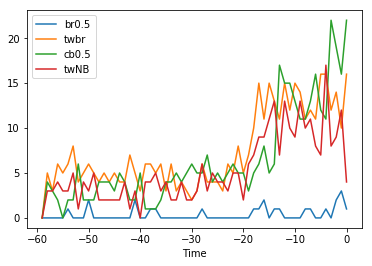

In [25]:
endbhvr = timegrp.apply(bhvrcount).sort_index(ascending=False)
endbhvr.to_csv('EndBehavior.csv')
endbhvr.plot();

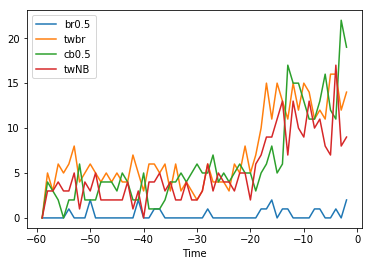

In [27]:
endbhvrLenMore2 = timegrp.filter(lambda x: x.Time.max() < -1).groupby('Time').apply(bhvrcount)
endbhvrLenMore2.to_csv('EndBehavior,gamelen more 2.csv')
endbhvrLenMore2.plot();

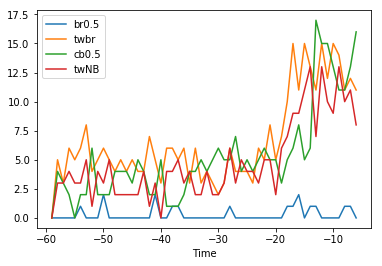

In [28]:
endbhvrLenMore6 = timegrp.filter(lambda x: x.Time.max() < -5).groupby('Time').apply(bhvrcount)
endbhvrLenMore6.to_csv('EndBehavior,gamelen more 6.csv')
endbhvrLenMore6.plot();

In [89]:
timegrp.filter(lambda x: x.Time.max() < -5).Game.unique()

array([40, 41, 43, 56, 57, 58, 60, 61, 92, 93, 94], dtype=int64)

In [24]:
lastSteps=YHData[['Game','Time']].groupby('Game').max(); lastSteps

,Time
Game,
40,60
41,19
42,6
43,60
56,31
57,60
58,15
59,2
60,15


## Для правого столбца

In [29]:
YHData.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'g', 'br', 'br0', 'br0.5', 'br1', 'twbr',
       'iscb0', 'iscb0.5', 'iscb1', 'Ui>U', 'Unew>U', 'Fnew>F', 'Ui', 'Unew',
       'U'],
      dtype='object')

In [ ]:
tg = YHData.groupby(['Game','Time'])

In [32]:
cnt = 0
for name,group in tg:
    if (group['Unew>U']>0).all() and (group['iscb1']>0).all(): cnt += 1
cnt

25

In [36]:
cnt = 0
for name,group in tg:
    if (group['twbr']>0).all(): cnt += 1
cnt

29

### График длин игр

In [64]:
gamelength=YHData[['Game','Time']].groupby('Game').max()

In [65]:
a=gamelength.sort_values(by='Time')

In [66]:
a['Game']=range(1,15)

In [67]:
b=a.rename(columns={'Time':'Game length'})

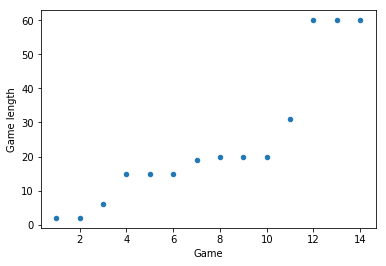

In [68]:
p=b.plot.scatter(x='Game',y='Game length')

In [69]:
p.get_figure().savefig('Gameslen.png',dpi=100)

In [31]:
GLData.axes

[Int64Index([6573, 6574, 6575, 6576, 6577, 6578, 6579, 6580, 6581, 6582, 6583,
             6584, 6585, 6586, 6587, 6588, 6589, 6590, 6591, 6592, 6593, 6594,
             6595, 6596, 6597, 6598, 6599, 6600, 6601, 6602, 6603, 6604, 6605,
             6606, 6607, 6608, 6609, 6610, 6611, 6612, 6613, 6614, 6615, 6616,
             6617, 6618, 6619, 6620, 6621, 6622, 6623, 6624, 6625, 6626, 6627,
             6628, 6629, 6630, 6631, 6632],
            dtype='int64'),
 Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
        'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
        'CalcAdviceCount', 'UseHelp'],
       dtype='object')]

### Доля КП в GL experimental design

In [9]:
GLCounts = getCBofAllGames(GLData,dim=3)
GLCounts['Steps Count %'] = GLCounts['Steps Count']/(2847/100)
GLCounts

,CB Count,Steps Count,Steps Count %
eps,,,
0,340,1004,35.265191
1,419,1238,43.484370
2,486,1452,51.001054
3,507,1519,53.354408
4,512,1595,56.023885
5,525,1652,58.025992
6,529,1692,59.430980
7,532,1714,60.203723
8,544,1764,61.959958


In [10]:
GLCounts.to_clipboard()

In [15]:
GLECounts = getCBofAllGames(GLEData,dim=3)
GLECounts['Steps Count %'] = GLECounts['Steps Count']/(60/100)
GLECounts

,CB Count,Steps Count,Steps Count %
eps,,,
0,5,11,18.333333
1,5,11,18.333333
2,6,13,21.666667
3,6,13,21.666667
4,8,17,28.333333
5,9,19,31.666667
6,10,21,35.000000
7,10,21,35.000000
8,9,21,35.000000


### Доля КП в YH

In [16]:
print(YHData.shape,YHEData.shape)

(1035, 16) (90, 16)


In [67]:
YHCB = getCBwithEps(YHData,eps=0.5)
YHCB.sort_values(by=['game','ts']).head()

,ts,te,subject,game,gamelength
0,1,4,1,40,60
42,1,3,2,40,60
100,1,3,3,40,60
1,6,8,1,40,60
101,6,8,3,40,60


In [55]:
(YHCB['te']-YHCB['ts']).sum()

NameError: name 'YHCB' is not defined

In [10]:
def cbStepsCount(cbdata,sh=0):
    return (cbdata['te']-cbdata['ts']+sh).sum()

In [11]:
pd.DataFrame(data=[cbStepsCount(getCBwithEps(YHData,e),0) for e in [0,0.5,1]],
             columns=['Steps count'], index=['CB(0)','CB(0.5)','CB(1)'])

,Steps count
CB(0),329
CB(0.5),388
CB(1),462


In [43]:
YHCB.shape

(152, 5)

In [68]:
dcb = DataMarkedCB(YHData,YHCB)

In [35]:
%store dcb

Stored 'dcb' (DataFrame)


In [70]:
dcb.head(6)

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,s2,s3,AcceptAdvice,CalcCount,CalcAdviceCount,UseHelp,iscb
0,40,1,6,1,2,9.0,2.129054,5.74200,52.953488,NaN,99.0,NaN,0.0,0.0,0.0,0.0,0.0
1,40,1,10,1,3,25.0,3.551163,5.75000,61.511628,NaN,115.0,NaN,0.0,0.0,0.0,0.0,0.0
2,40,1,11,1,1,1.0,1.131904,0.10700,0.534884,NaN,1.0,NaN,0.0,0.0,0.0,2.0,0.0
3,40,2,6,1,2,9.0,2.122540,5.74695,52.928870,NaN,99.0,NaN,0.0,0.0,0.0,1.0,1.0
4,40,2,10,1,3,25.0,3.543875,5.75575,61.483031,NaN,115.0,NaN,0.0,3.0,0.0,1.0,1.0
5,40,2,11,1,1,1.0,1.142498,0.11770,0.588099,NaN,1.1,NaN,0.0,0.0,0.0,1.0,1.0


In [45]:
dcb[dcb['iscb']>0].count()

Game               388
Time               388
Subject            388
Group              388
GrSubject          388
Type               388
Gain               388
Penalty            388
x                  388
s1                   0
s2                 388
s3                   0
AcceptAdvice       388
CalcCount          388
CalcAdviceCount    388
UseHelp            111
iscb               388
dtype: int64

In [36]:
dcb[dcb['iscb']<1].count()

Game               706
Time               706
Subject            706
Group              706
GrSubject          706
Type               706
Gain               706
Penalty            706
x                  706
s1                   0
s2                 706
s3                   0
AcceptAdvice       706
CalcCount          706
CalcAdviceCount    706
UseHelp            264
iscb               706
dtype: int64

In [10]:
YHData.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp'],
      dtype='object')

In [11]:
YHData[(YHData['Game']==40) & (YHData['GrSubject']==1) & (YHData['Time']>=31) & (YHData['Time']<=34)]

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,s2,s3,AcceptAdvice,CalcCount,CalcAdviceCount,UseHelp
2624,40,31,11,1,1,1.0,1.623527,0.0325,1.742424,NaN,1.0,NaN,0.0,0.0,0.0,1.0
2627,40,32,11,1,1,1.0,5.393992,1.3000,43.809524,NaN,40.0,NaN,0.0,0.0,0.0,1.0
2630,40,33,11,1,1,1.0,5.046249,1.4400,41.071429,NaN,40.0,NaN,0.0,0.0,0.0,1.0
2633,40,34,11,1,1,1.0,4.935892,1.4430,39.690265,NaN,39.0,NaN,0.0,4.0,0.0,6.0


In [44]:
(YHCB['te']-YHCB['ts']).sum()

329

In [28]:
Counts = getCBofAllGames(YHData)
Counts['Steps Count %'] = Counts['Steps Count']/(YHData.shape[0]/100)
Counts

,CB Count,Steps Count,Steps Count %
eps,,,
0,139,468,45.217391
1,189,651,62.898551
2,201,713,68.888889
3,207,752,72.657005
4,212,785,75.845411
5,238,892,86.183575
6,230,890,85.990338
7,223,890,85.990338
8,221,897,86.666667


In [19]:
YHData.shape

(1035, 16)

In [58]:
Counts.to_clipboard()

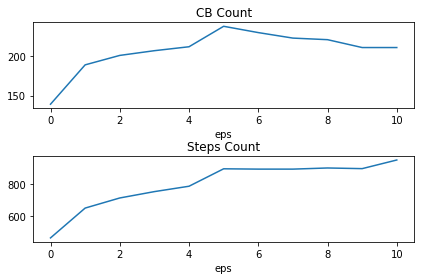

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].set_title('CB Count')
axes[1].set_title('Steps Count')
Counts['CB Count'].plot(ax=axes[0])
Counts['Steps Count'].plot(ax=axes[1])
fig.tight_layout(h_pad=0.1)
fig.savefig('CB_StepsCount.png',dpi=100)

In [19]:
YHEData.shape

(75, 16)

In [56]:
CountsExp = getCBofAllGames(YHEData)
CountsExp['Steps Count %'] = CountsExp['Steps Count']/(YHEData.shape[0]/100)
CountsExp

,CB Count,Steps Count,Steps Count %
eps,,,
0,11,27,36.000000
1,11,28,37.333333
2,12,30,40.000000
3,12,30,40.000000
4,12,30,40.000000
5,17,40,53.333333
6,17,40,53.333333
7,17,40,53.333333
8,17,40,53.333333


## Для графиков числа КП и шагов в них

In [16]:
Meta={'basecount':YHData.shape[0],'expcount':YHEData.shape[0]}

### Для статьи "КП итог"

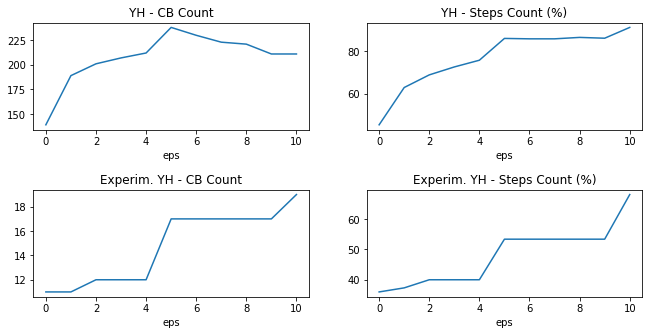

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set_title('YH - CB Count')
axes[1,0].set_title('Experim. YH - CB Count')
axes[0,1].set_title('YH - Steps Count (%)')
axes[1,1].set_title('Experim. YH - Steps Count (%)')
CountsExp['CB Count'].plot(ax=axes[1,0])
(CountsExp['Steps Count']/(Meta['expcount']/100)).plot(ax=axes[1,1])
Counts['CB Count'].plot(ax=axes[0,0])
(Counts['Steps Count']/(Meta['basecount']/100)).plot(ax=axes[0,1])
fig.tight_layout(h_pad=0.1)
fig.set_size_inches((10,5))
fig.savefig('YHE_CB_StepsCount.png',dpi=150)

### Для презентации на УБС-2018

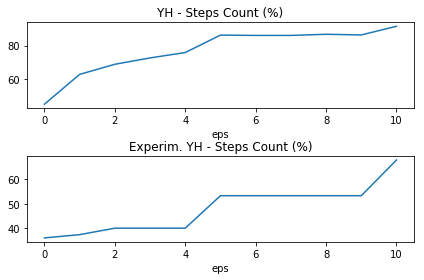

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=1)
#axes[0,0].set_title('YH - CB Count')
#axes[1,0].set_title('Experim. YH - CB Count')
axes[0].set_title('YH - Steps Count (%)')
axes[1].set_title('Experim. YH - Steps Count (%)')
#CountsExp['CB Count'].plot(ax=axes[1,0])
CountsExp['Steps Count'].plot(ax=axes[1])
#Counts['CB Count'].plot(ax=axes[0,0])
Counts['Steps Count'].plot(ax=axes[0])
fig.tight_layout(h_pad=0.1)
#fig.set_size_inches((10,5))
fig.savefig('YHE_CB_StepsCount.png',dpi=150)

In [82]:
CountsExp['Steps Count']/75

eps
0     0.360000
1     0.373333
2     0.400000
3     0.400000
4     0.400000
5     0.533333
6     0.533333
7     0.533333
8     0.533333
9     0.533333
10    0.680000
Name: Steps Count, dtype: float64

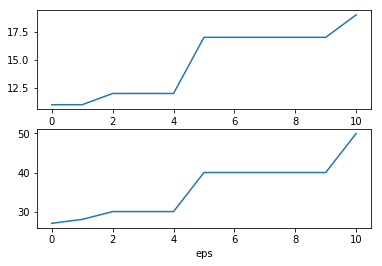

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=1)
CountsExp['CB Count'].plot(ax=axes[0])
CountsExp['Steps Count'].plot(ax=axes[1])
fig.savefig('YHE_CB_StepsCount.png',dpi=100)

In [64]:
GLData[['Time','x']].iloc[-3:]

,Time,x
6411,8,22.133333
6412,8,42.333333
6413,8,50.533333


### Распределение, эфф-е по Нэш-торгам

NashOpt - оптимальное распределение ресурсов для максимизации функции торгов Нэша $ \Pi_i (u_i(x_i)-u_i(0)) $ :

In [ ]:
NashOpt=[32.0724,39.1355,43.7921]

In [115]:
gamegroups = GLData.groupby('Game')

a = []
for g,data in gamegroups:
    data.sort_values(by=['Time','GrSubject'])
    a.append( data['x'].iloc[-3:].values )

In [116]:
a

[array([38.13333333, 44.        , 32.86666667]),
 array([42.06666667, 41.70833333, 31.225     ]),
 array([ 166.66666667,   53.75      , -152.5       ]),
 array([ 0.15, 66.25, 48.6 ]),
 array([33.       , 28.5034256, 53.4965744]),
 array([41., 49., 25.]),
 array([25., 49., 41.]),
 array([41., 25., 49.]),
 array([25., 49., 41.]),
 array([24.83333333, 41.33333333, 48.83333333]),
 array([65.,  0., 50.]),
 array([ 43.33333333, -28.33333333, 100.        ]),
 array([45.  , 45.75, 24.25]),
 array([25., 41., 49.]),
 array([ 0. , 69.5, 45.5]),
 array([34.33333333, 42.        , 38.66666667]),
 array([32.33333333, 32.66666667, 46.66666667]),
 array([47.33333333, 21.66666667, 46.        ]),
 array([25., 49., 41.]),
 array([53.66666667, 26.75      , 34.58333333]),
 array([37.6       , 38.96666667, 38.4       ]),
 array([27.5       , 40.25      , 45.83333333]),
 array([48.33333333, 22.13333333, 44.53333333]),
 array([52.83333333, 38.33333333, 23.5       ]),
 array([46.33333333, 22.33333333, 46.333333

In [81]:
from scipy.spatial import distance

In [119]:
npd = distance.cdist(a,[[115/3,115/3,115/3],[49,41,25],[32.0724, 39.1355, 43.7921]],'cityblock')
npd2 = distance.cdist(a,[[115/3,115/3,115/3],[49,41,25],[32.0724, 39.1355, 43.7921]],'euclidean')

[np.mean(npd,axis=0),np.mean(npd2,axis=0)]

[array([41.02181685, 49.6502236 , 42.39936481]),
 array([26.79171582, 32.52246141, 27.75504135])]

In [96]:
gamegroups = YHData.groupby('Game')

In [97]:
a = []
for g,data in gamegroups:
    data.sort_values(by=['Time','GrSubject'])
    a.append( data['x'].iloc[-3:].values )

In [99]:
npd = distance.cdist(a,[[49,41,25],[22.81,115/3,53.85]],'cityblock')
npd2 = distance.cdist(a,[[49,41,25],[22.81,115/3,53.85]],'euclidean')

In [100]:
np.mean(npd,axis=0)

array([51.26294136, 53.61308444])

In [101]:
np.mean(npd2,axis=0)

array([32.4326487 , 34.89020465])

In [98]:
a

[array([38.33333333, 38.33333333, 38.33333333]),
 array([50.88495575, 40.7079646 , 23.40707965]),
 array([68.69666408, 44.60822343,  1.69511249]),
 array([43.07116105, 22.39700375, 49.53183521]),
 array([24.64285714, 65.71428571, 24.64285714]),
 array([45.72289157, 53.1124498 , 16.16465863]),
 array([  3.74230431,  10.11433597, 101.14335972]),
 array([37.77444254, 39.45111492, 37.77444254]),
 array([ 8.69747899,  9.66386555, 96.63865546]),
 array([37.57523646, 37.87188306, 39.55288048]),
 array([35.63511327, 43.72977346, 35.63511327]),
 array([32.45967742, 46.37096774, 36.16935484]),
 array([27.38095238, 21.9047619 , 65.71428571]),
 array([39.57322552, 37.1967655 , 38.23000898])]

In [102]:
def f(x,r):
    import math
    return math.sqrt(r+x)-math.sqrt(r)

In [103]:
def Nf(x,r):
    return f(x[0],r[0])*f(x[1],r[1])*f(x[2],r[2])

In [107]:
Nf([22.81,115/3,53.85],[1,9,25])

58.39938875025514

In [105]:
Nf([20,40,55],[1,9,25])

56.522610716240145

In [108]:
Nf([115/3,115/3,115/3],[1,9,25])

60.50607771202381

In [109]:
22.81+115/3+53.85

114.99333333333334

In [110]:
Nf([32.0724, 39.1355, 43.7921],[1,9,25])

61.62857193511759

In [114]:
Nf([49,41,25],[1,9,25])

51.187950266179705

## Оценка распределения длин КП

In [10]:
cbs = getCBwithEps(YHData)

In [11]:
notStoppedCbs = cbs[cbs['te']!=cbs['gamelength']]

In [12]:
lengths = (notStoppedCbs['te']-notStoppedCbs['ts'])

In [13]:
lengths.values

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 3, 8, 3, 5, 1, 1, 1,
       1, 2, 3, 2, 2, 2, 1, 5, 1, 1, 6, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 2, 5, 1, 1, 1, 1, 1, 5, 4, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1,
       1, 4, 5, 1, 3, 2, 1, 2, 2, 2, 1, 7, 3, 2, 1, 1, 1, 1, 3, 2, 3, 6,
       1, 6, 8, 1, 8, 1, 3, 11, 1, 2, 5, 1, 1, 1, 2, 1, 2, 6, 3, 1, 3, 1,
       2, 4, 1, 1, 4, 1, 3, 2], dtype=object)

In [2]:
from scipy import stats
from scipy.stats import logser
from statsmodels.base.model import GenericLikelihoodModel

In [15]:
class LogFit(GenericLikelihoodModel):
    def __init__(self, endog, exog=None, **kwds):
        if exog is None:
            exog = np.zeros_like(endog)
            
        super(LogFit, self).__init__(endog, exog, **kwds)
    
    def nloglikeobs(self, params):

        return -np.log(logser.pmf(self.endog, p=params[0]))
    
    def fit(self, start_params=None, maxiter=10000, maxfun=5000, **kwds):
        if start_params is None:
            excess_zeros = 0.5 #(self.endog == 0).mean() - stats.poisson.pmf(0, lambda_start)
            
            start_params = np.array([excess_zeros])
            
        return super(LogFit, self).fit(start_params=start_params,
                                                    maxiter=maxiter, maxfun=maxfun, **kwds)

In [20]:
results = LogFit(lengths.values.tolist()).fit()

Optimization terminated successfully.
         Current function value: 1.520917
         Iterations: 14
         Function evaluations: 28


In [21]:
plog = results.params.item()

In [22]:
plog

0.7646484375000007

In [66]:
notStoppedCbs.shape

(118, 5)

In [74]:
118*(1-logser.pmf(1,plog)-logser.pmf(2,plog)-logser.pmf(3,plog)-logser.pmf(4,plog)-logser.pmf(5,plog)-logser.pmf(6,plog)) #smallclass

5.676809626210824

smallclass <~ 5 then use classes 1,2,3,4,5,[6,...]

In [108]:
def myclass(a):
    if a > 4:
        return 5
    else:
        return a

In [96]:
lengths.index = lengths.values

In [109]:
histclasses = lengths.groupby(myclass).count()

In [110]:
histclasses

1    63
2    21
3    13
4     5
5    16
dtype: int64

In [113]:
expclassesp = [logser.pmf(1,plog),logser.pmf(2,plog),logser.pmf(3,plog),logser.pmf(4,plog)]
expclassesp.append( 1 - np.sum(expclassesp) )

In [114]:
expclasses = np.multiply(118,expclassesp)

In [117]:
stats.chisquare(histclasses.values,expclasses,1)

Power_divergenceResult(statistic=1.84401018997024, pvalue=0.6054049725007631)

### Гипотеза падения выигрышей

In [67]:
arr = np.loadtxt('2.txt')

In [61]:
np.shape(arr)

(2, 198)

In [46]:
stats.wilcoxon(arr[0],arr[1],zero_method='wilcox')

WilcoxonResult(statistic=2110.0, pvalue=6.705348674323277e-06)

In [23]:
d=pd.DataFrame(arr[0]-arr[1])

In [25]:
d['abs']=abs(d[0])

In [30]:
dsrt = d.sort_values(by='abs')

In [39]:
dsrtnn = dsrt[dsrt['abs']>0].copy()

In [40]:
dsrtnn['rank'] = range(1,dsrtnn.shape[0]+1)

In [45]:
dsrtnn[dsrtnn[0]<0]['rank'].sum()

2110

In [51]:
(np.sign(dsrtnn[0])*dsrtnn['rank']).sum()

3655.0

In [52]:
from math import sqrt

In [53]:
n = 125
sigma = sqrt( n*(n+1)*(2*n+1)/6 )

In [54]:
sigma

811.7111555227019

In [55]:
sigma*1.96

1590.9538648244957

In [57]:
2*(1-stats.norm.cdf(3655.0/sigma))

6.7053486743073876e-06

In [68]:
stats.mannwhitneyu(arr[0],arr[1],alternative='less')

MannwhitneyuResult(statistic=20470.5, pvalue=0.9997420978922387)

# К GTM2019

In [25]:
totYHdata['g'].nlargest(10)

892    186.007148
23      96.172919
300     67.404161
728     54.492703
759     44.189762
600     30.202106
771     21.696942
312     20.520242
200     12.280710
453     10.840655
Name: g, dtype: float64

In [23]:
"br"
brcnt=totYHdata[(totYHdata['s2']>totYHdata['br']-1) & (totYHdata['s2']<totYHdata['br']+1)]
brcnt.shape

(47, 18)

In [28]:
"twBR"
twbrcnt = totYHdata[totYHdata['g']>0]
twbrcnt.shape

(441, 18)

In [52]:
"twBR общие шаги"
commtwbr = totYHdata.groupby(by=['Game','Time'])

cnt = 0
for name,group in commtwbr:
    if (group['g']>0).all(): cnt += 1
print(cnt)

allcnt = 0
for _ in YHData.groupby(['Game','Time']):
    allcnt+=1
print(allcnt)

29
345


In [ ]:
"CB общие шаги"

In [68]:
YHCB = getCBwithEps(YHData,eps=1)

In [69]:
dcb = DataMarkedCB(totYHData,YHCB)
dcb[dcb['iscb']>0].shape

(462, 17)

In [70]:
commCB = dcb.groupby(['Game','Time'])
cnt = 0
for name,group in commCB:
    if (group['iscb']>0).all(): cnt += 1
print(cnt)

46


In [61]:
dcb.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'iscb'],
      dtype='object')

In [72]:
%store dcb

Stored 'dcb' (DataFrame)
